1.1 There is a constant battle between the three elements of the healthcare iron triangle: Access to care, cost, and quality, with sharp conflicts and trade-offs between them. A major driver in all this is the cost of care, when resources are low and demands are high, especially in a time amid a pandemic. However,  despite resource constraints, health care fraud is extremely costly and prevalent. The National Health Care Anti-Fraud Association (NHCAA) estimates that the financial losses due to health care fraud are in the tens of billions of dollars each year. A conservative estimate is 3% of total health care expenditures, while some government and law enforcement agencies place the loss as high as 10% of our annual health outlay, which could mean more than $300 billion. <br>
This project is going to try to identify fraudulent providers for investigations based on claims filed

1.2 To complete this analysis, we will need the following datasets: <br>
-inpatient data: data about patients who were admitted in the hospitals, including patient ID, claim ID, admit and discharge dates, physician ID, procedures code  <br>
-beneficiary data: including beneficiary ID, date of birth, gender, state, country <br>
-outpatient data: patients who are not admitted, including patient ID, claim ID, physician ID, procedures code  <br>


In [7]:
import pandas as pd

#import training and testing datasets
Inpatient_Test=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Inpatient_Test.csv')
Inpatient_Train=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Inpatient_Train.csv')
Beneficiary_Test=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Beneficiary_Test.csv')
Beneficiary_Train=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Beneficiary_Train.csv')
Outpatient_Test=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Outpatient_Test.csv')
Outpatient_Train=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Outpatient_Train.csv')
Test_File=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Test_File.csv')
Train_File=pd.read_csv('/Users/sandyyuchuhuang/Desktop/Capstone Project/Train_File.csv')


In [12]:
#Let's look at the first five rows of our datasets
Inpatient_Test.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
Outpatient_Test.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [14]:
Outpatient_Train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [15]:
Beneficiary_Test.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [16]:
Beneficiary_Train.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [18]:
Test_File.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [19]:
Train_File.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [37]:


#Dataset Shapes are shown below
print('inpatient_Test=',Inpatient_Test.values.shape)
print('inpatient_Train=',Inpatient_Train.values.shape)
print('Outpatient_Train=',Outpatient_Train.values.shape)
print('Outpatient_Test=',Outpatient_Test.values.shape)
print('Beneficiary_Test=',Beneficiary_Test.values.shape)
print('Beneficiary_Train=',Beneficiary_Train.values.shape)
print('Test_File=',Test_File.values.shape)
print('Train_FIle=',Train_File.values.shape)

inpatient_Test= (9551, 30)
inpatient_Train= (40474, 30)
Outpatient_Train= (517737, 27)
Outpatient_Test= (125841, 27)
Beneficiary_Test= (63968, 25)
Beneficiary_Train= (138556, 25)
Test_File= (1353, 1)
Train_FIle= (5410, 2)


In [39]:
#Checking basic Statistics
print('inpatient_Test=',Inpatient_Test.describe)

inpatient_Test= <bound method NDFrame.describe of           BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0      BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1      BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2      BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3      BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4      BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   
...          ...       ...          ...         ...       ...   
9546  BENE159139  CLM61015   2009-07-24  2009-07-26  PRV55021   
9547  BENE159143  CLM42885   2009-03-16  2009-03-29  PRV55017   
9548  BENE159155  CLM67124   2009-09-07  2009-10-12  PRV53758   
9549  BENE159181  CLM72016   2009-10-14  2009-10-17  PRV57195   
9550  BENE159196  CLM47313   2009-04-17  2009-04-18  PRV51854   

      InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                       9000          PHY317786          PHY427017   
1                      14000 

In [40]:
print('Outpatient_Train=',Outpatient_Train.describe)


Outpatient_Train= <bound method NDFrame.describe of             BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1        BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2        BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3        BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4        BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   
...            ...        ...          ...         ...       ...   
517732  BENE159198  CLM510792   2009-08-06  2009-08-06  PRV53699   
517733  BENE159198  CLM551294   2009-08-29  2009-08-29  PRV53702   
517734  BENE159198  CLM596444   2009-09-24  2009-09-24  PRV53676   
517735  BENE159198  CLM636992   2009-10-18  2009-10-18  PRV53689   
517736  BENE159198  CLM686139   2009-11-17  2009-11-18  PRV53689   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY326117          

In [41]:
print('Outpatient_Test=',Outpatient_Test.describe)


Outpatient_Test= <bound method NDFrame.describe of             BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1        BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2        BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3        BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4        BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   
...            ...        ...          ...         ...       ...   
125836  BENE159193  CLM469576   2009-07-14  2009-07-14  PRV55485   
125837  BENE159193  CLM483842   2009-07-22  2009-07-22  PRV55485   
125838  BENE159193  CLM554925   2009-08-31  2009-08-31  PRV55485   
125839  BENE159194  CLM347777   2009-05-08  2009-05-08  PRV55889   
125840  BENE159197  CLM357675   2009-05-13  2009-05-13  PRV52983   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY347633           

In [43]:
print('Beneficiary_Test=',Beneficiary_Test.describe)

Beneficiary_Test= <bound method NDFrame.describe of            BeneID         DOB         DOD  Gender  Race RenalDiseaseIndicator  \
0       BENE11001  1943-01-01         NaN       1     1                     0   
1       BENE11007  1940-09-01  2009-12-01       1     2                     0   
2       BENE11010  1936-07-01         NaN       2     1                     0   
3       BENE11011  1914-03-01         NaN       2     2                     0   
4       BENE11014  1938-04-01         NaN       2     1                     Y   
...           ...         ...         ...     ...   ...                   ...   
63963  BENE159187  1959-07-01         NaN       1     1                     0   
63964  BENE159193  1936-12-01         NaN       2     1                     0   
63965  BENE159194  1939-07-01         NaN       1     1                     0   
63966  BENE159196  1916-06-01         NaN       2     1                     0   
63967  BENE159197  1930-01-01         NaN       1     1  

In [44]:
print('Beneficiary_Train=',Beneficiary_Train.describe)

Beneficiary_Train= <bound method NDFrame.describe of             BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0        BENE11001  1943-01-01  NaN       1     1                     0   
1        BENE11002  1936-09-01  NaN       2     1                     0   
2        BENE11003  1936-08-01  NaN       1     1                     0   
3        BENE11004  1922-07-01  NaN       1     1                     0   
4        BENE11005  1935-09-01  NaN       1     1                     0   
...            ...         ...  ...     ...   ...                   ...   
138551  BENE159194  1939-07-01  NaN       1     1                     0   
138552  BENE159195  1938-12-01  NaN       2     1                     0   
138553  BENE159196  1916-06-01  NaN       2     1                     0   
138554  BENE159197  1930-01-01  NaN       1     1                     0   
138555  BENE159198  1952-04-01  NaN       2     1                     0   

        State  County  NoOfMonths_PartACov  No

In [45]:
print('Test_File=',Test_File.describe)


Test_File= <bound method NDFrame.describe of       Provider
0     PRV51002
1     PRV51006
2     PRV51009
3     PRV51010
4     PRV51018
...        ...
1348  PRV57713
1349  PRV57726
1350  PRV57745
1351  PRV57749
1352  PRV57750

[1353 rows x 1 columns]>


In [46]:
print('Train_FIle=',Train_File.describe)

Train_FIle= <bound method NDFrame.describe of       Provider PotentialFraud
0     PRV51001             No
1     PRV51003            Yes
2     PRV51004             No
3     PRV51005            Yes
4     PRV51007             No
...        ...            ...
5405  PRV57759             No
5406  PRV57760             No
5407  PRV57761             No
5408  PRV57762             No
5409  PRV57763             No

[5410 rows x 2 columns]>


In [48]:
#Check if there are duplicate values in patient ID and provider ID for the test files

any(Inpatient_Test['BeneID'].duplicated())

True

In [49]:
any(Outpatient_Test['BeneID'].duplicated())

True

In [50]:
any(Beneficiary_Test['BeneID'].duplicated())

False

In [51]:
any(Test_File['Provider'].duplicated())

#Provider ID are unique

False

In [53]:
#Check missing values for providerID in Test data
print('\n Total missing values in Train Data :',Test_File.isna().sum().sum())


 Total missing values in Train Data : 0


In [55]:
#Check missing values for all the columns in beneficiary data
Beneficiary_Train.isna().sum()
Beneficiary_Test.isna().sum()

#there are 63394 missing datas in DOD, and we know the datatype is integer

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [64]:
#Check missing values in each column in inpatient data
Inpatient_Train.isna().sum()

Inpatient_Train.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [69]:
#Check missing values in in outpatient data

Outpatient_Train.isna().sum()

Outpatient_Test.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [56]:
#To make it easier to understand, replace "0" for nonchronic conditions, replace "1" for chronic conditions
Beneficiary_Train = Beneficiary_Train.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Beneficiary_Train= Beneficiary_Train.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Beneficiary_Test = Beneficiary_Test .replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Beneficiary_Test= Beneficiary_Test.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [58]:
#Let's see what the data looks like now, 3 rows should be enough. 

Beneficiary_Train.head(3)
Beneficiary_Test.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,0,1,1,1,0,0,0,0,1170,660


In [59]:
#I would want to later take into consideration of the patients' age, let's enrich the data by adding age, since we have information on DOB & DOD


Beneficiary_Train['DOB'] = pd.to_datetime(Beneficiary_Train['DOB'] , format = '%Y-%m-%d')
Beneficiary_Train['DOD'] = pd.to_datetime(Beneficiary_Train['DOD'],format = '%Y-%m-%d',errors='ignore')
Beneficiary_Train['Age'] = round(((Beneficiary_Train['DOD'] - Beneficiary_Train['DOB']).dt.days)/365)


Beneficiary_Test['DOB'] = pd.to_datetime(Beneficiary_Test['DOB'] , format = '%Y-%m-%d')
Beneficiary_Test['DOD'] = pd.to_datetime(Beneficiary_Test['DOD'],format = '%Y-%m-%d',errors='ignore')
Beneficiary_Test['Age'] = round(((Beneficiary_Test['DOD'] - Beneficiary_Test['DOB']).dt.days)/365)



In [60]:
#Let's see what the data looks like now, 3 rows should be enough. 

Beneficiary_Train.head(3)
Beneficiary_Test.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,NaN
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,...,1,1,1,0,0,0,0,1170,660,NaN


In [65]:
#It's important to know how many days patents are admitted, when it comes to inpatient data

Inpatient_Train['AdmissionDt'] = pd.to_datetime(Inpatient_Train['AdmissionDt'] , format = '%Y-%m-%d')
Inpatient_Train['DischargeDt'] = pd.to_datetime(Inpatient_Train['DischargeDt'],format = '%Y-%m-%d')
Inpatient_Train['AdmitForDays'] = ((Inpatient_Train['DischargeDt'] - Inpatient_Train['AdmissionDt']).dt.days)+1

Inpatient_Test['AdmissionDt'] = pd.to_datetime(Inpatient_Test['AdmissionDt'] , format = '%Y-%m-%d')
Inpatient_Test['DischargeDt'] = pd.to_datetime(Inpatient_Test['DischargeDt'],format = '%Y-%m-%d')
Inpatient_Test['AdmitForDays'] = ((Inpatient_Test['DischargeDt'] - Inpatient_Test['AdmissionDt']).dt.days)+1


In [67]:
# What are the Max and min of AdmitforDays? How many are Null?

print('Min AdmitForDays Train:- ',Inpatient_Train.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Inpatient_Train.AdmitForDays.max())
Inpatient_Train.AdmitForDays.isnull().sum()   
print('Min AdmitForDays Test:- ',Inpatient_Test.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Inpatient_Test.AdmitForDays.max())
Inpatient_Test.AdmitForDays.isnull().sum()   

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [72]:
#Inpatient and outpatient data are similar, we try to merge them


Merge_Outpatient_Columes=Outpatient_Train.columns
print(Merge_Outpatient_Columes)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [77]:
#Merge Train data
Allpatient_Train=pd.merge(Outpatient_Train,Inpatient_Train,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],how='outer')

#Let's see the newly merged dataframe
Allpatient_Train.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,0.0,79380,NaT,NaT,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN


In [78]:
#Merge Test data
Allpatient_Test=pd.merge(Outpatient_Test,Inpatient_Test,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

#Let's see the newly merged dataframe
Allpatient_Test.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN


In [79]:
#Patient data can be merged with beneficiary data

Allpatient_Train=pd.merge(Allpatient_Train,Beneficiary_Train,left_on='BeneID',right_on='BeneID',how='inner')

Allpatient_Test=pd.merge(Allpatient_Test,Beneficiary_Test,left_on='BeneID',right_on='BeneID',how='inner')

In [82]:
print('Shape of All Patient Details Train : ',Allpatient_Train.shape)
Allpatient_Train.head(3)



Shape of All Patient Details Train :  (558211, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,0,0,0,0,0,30,50,NaN,0.0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,1,0,0,0,0,0,90,40,NaN,0.0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,1,0,0,0,0,0,90,40,NaN,0.0


In [81]:
print('Shape of All Patient Details Test : ',Allpatient_Test.shape)
Allpatient_Test.head(3)

Shape of All Patient Details Test :  (135392, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,1,0,1,1,36000,3204,60,70,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,1,0,1,1,36000,3204,60,70,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,1,0,1,1,0,0,0,1490,160,69.0


In [85]:
#One of the fraud type is collusion between patients and physicians (Providers), let's see how we can combine data with both patient and provider information



PP_Train=pd.merge(Train_File,Allpatient_Train,on='Provider')

PP_Test=pd.merge(Test_File,Allpatient_Test,on='Provider')

In [87]:
print("Shape of Train Provider with Patient Details data :-",PP_Train.shape)
PP_Train.head(3)



Shape of Train Provider with Patient Details data :- (558211, 58)


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,1,0,0,0,0,0,300,110,NaN,0.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,...,1,1,0,1,0,0,720,10,NaN,0.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,...,1,0,1,0,0,0,1380,370,NaN,0.0


In [86]:
print("Shape of Test Provider with Patient Details data :-",PP_Test.shape)
PP_Test.head(3)

Shape of Test Provider with Patient Details data :- (135392, 56)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,1,0,0,0,0,0,0,1310,590,NaN
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,1,0,0,0,22000,3204,1020,910,NaN
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,V4581,...,1,1,0,0,0,22000,3204,1020,910,NaN


In [89]:
#List of all the columne type
PP_Train.dtypes


Provider                                   object
PotentialFraud                             object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object


In [90]:
PP_Test.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


Potential Fraud, patient distribution:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


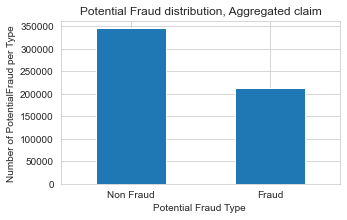

In [96]:
#Import seaborn


import seaborn as sns


#Plotting the frequencies of fraud and non-fraud Merged transactions in the data

sns.set_style('whitegrid',rc={'figure.figsize':(24,16)})
count_classes = pd.value_counts(PP_Train['PotentialFraud'], sort = True)
print("Potential Fraud, patient distribution:- \n",count_classes*100/len(PP_Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(5,3))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution, Aggregated claim")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Type ")
plt.ylabel("Number of PotentialFraud per Type ")

plt.savefig('PotentialFraud')

Potential Fraud, patient distribution:- 
 No     0.878521
Yes    0.090647
Name: PotentialFraud, dtype: float64


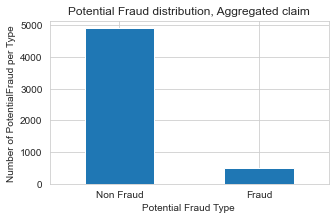

In [97]:
#PLotting the frequencies of fraud and non-fraud transactions in the train data


sns.set_style('whitegrid',rc={'figure.figsize':(24,16)})
count_classes = pd.value_counts(Train_File['PotentialFraud'], sort = True)
print("Potential Fraud, patient distribution:- \n",count_classes*100/len(PP_Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(5,3))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution, Aggregated claim")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Type ")
plt.ylabel("Number of PotentialFraud per Type ")

plt.savefig('PotentialFraud')

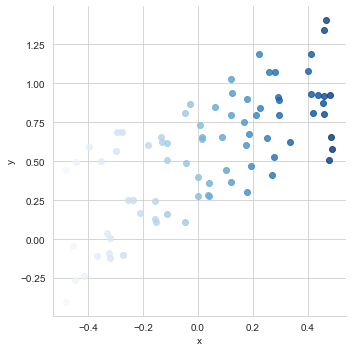

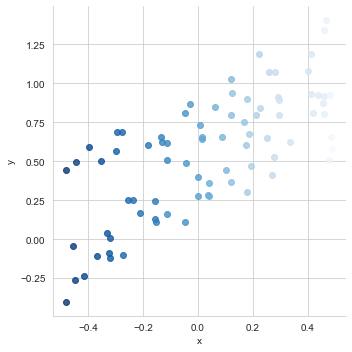

In [101]:
 #Exploring with color, just for fun

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
 
# create data
x = np.random.rand(80) - 0.5
y = x+np.random.rand(80)
z = x+np.random.rand(80)
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
 
# Plot with palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues")
 
# reverse palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues_r")


Text(0.5, 0, 'Race Type')

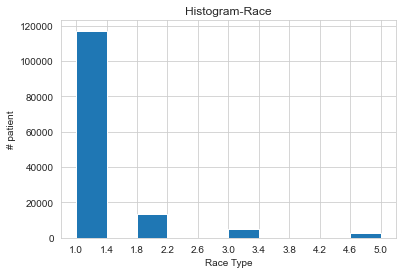

In [105]:
#Explore beneficiary race

count,bin_edges=np.histogram(Beneficiary_Train['Race'])
Beneficiary_Train['Race'].plot(kind='hist',xticks=bin_edges)
                              
plt.title('Histogram-Race')
plt.ylabel('# patient')
plt.xlabel('Race Type')

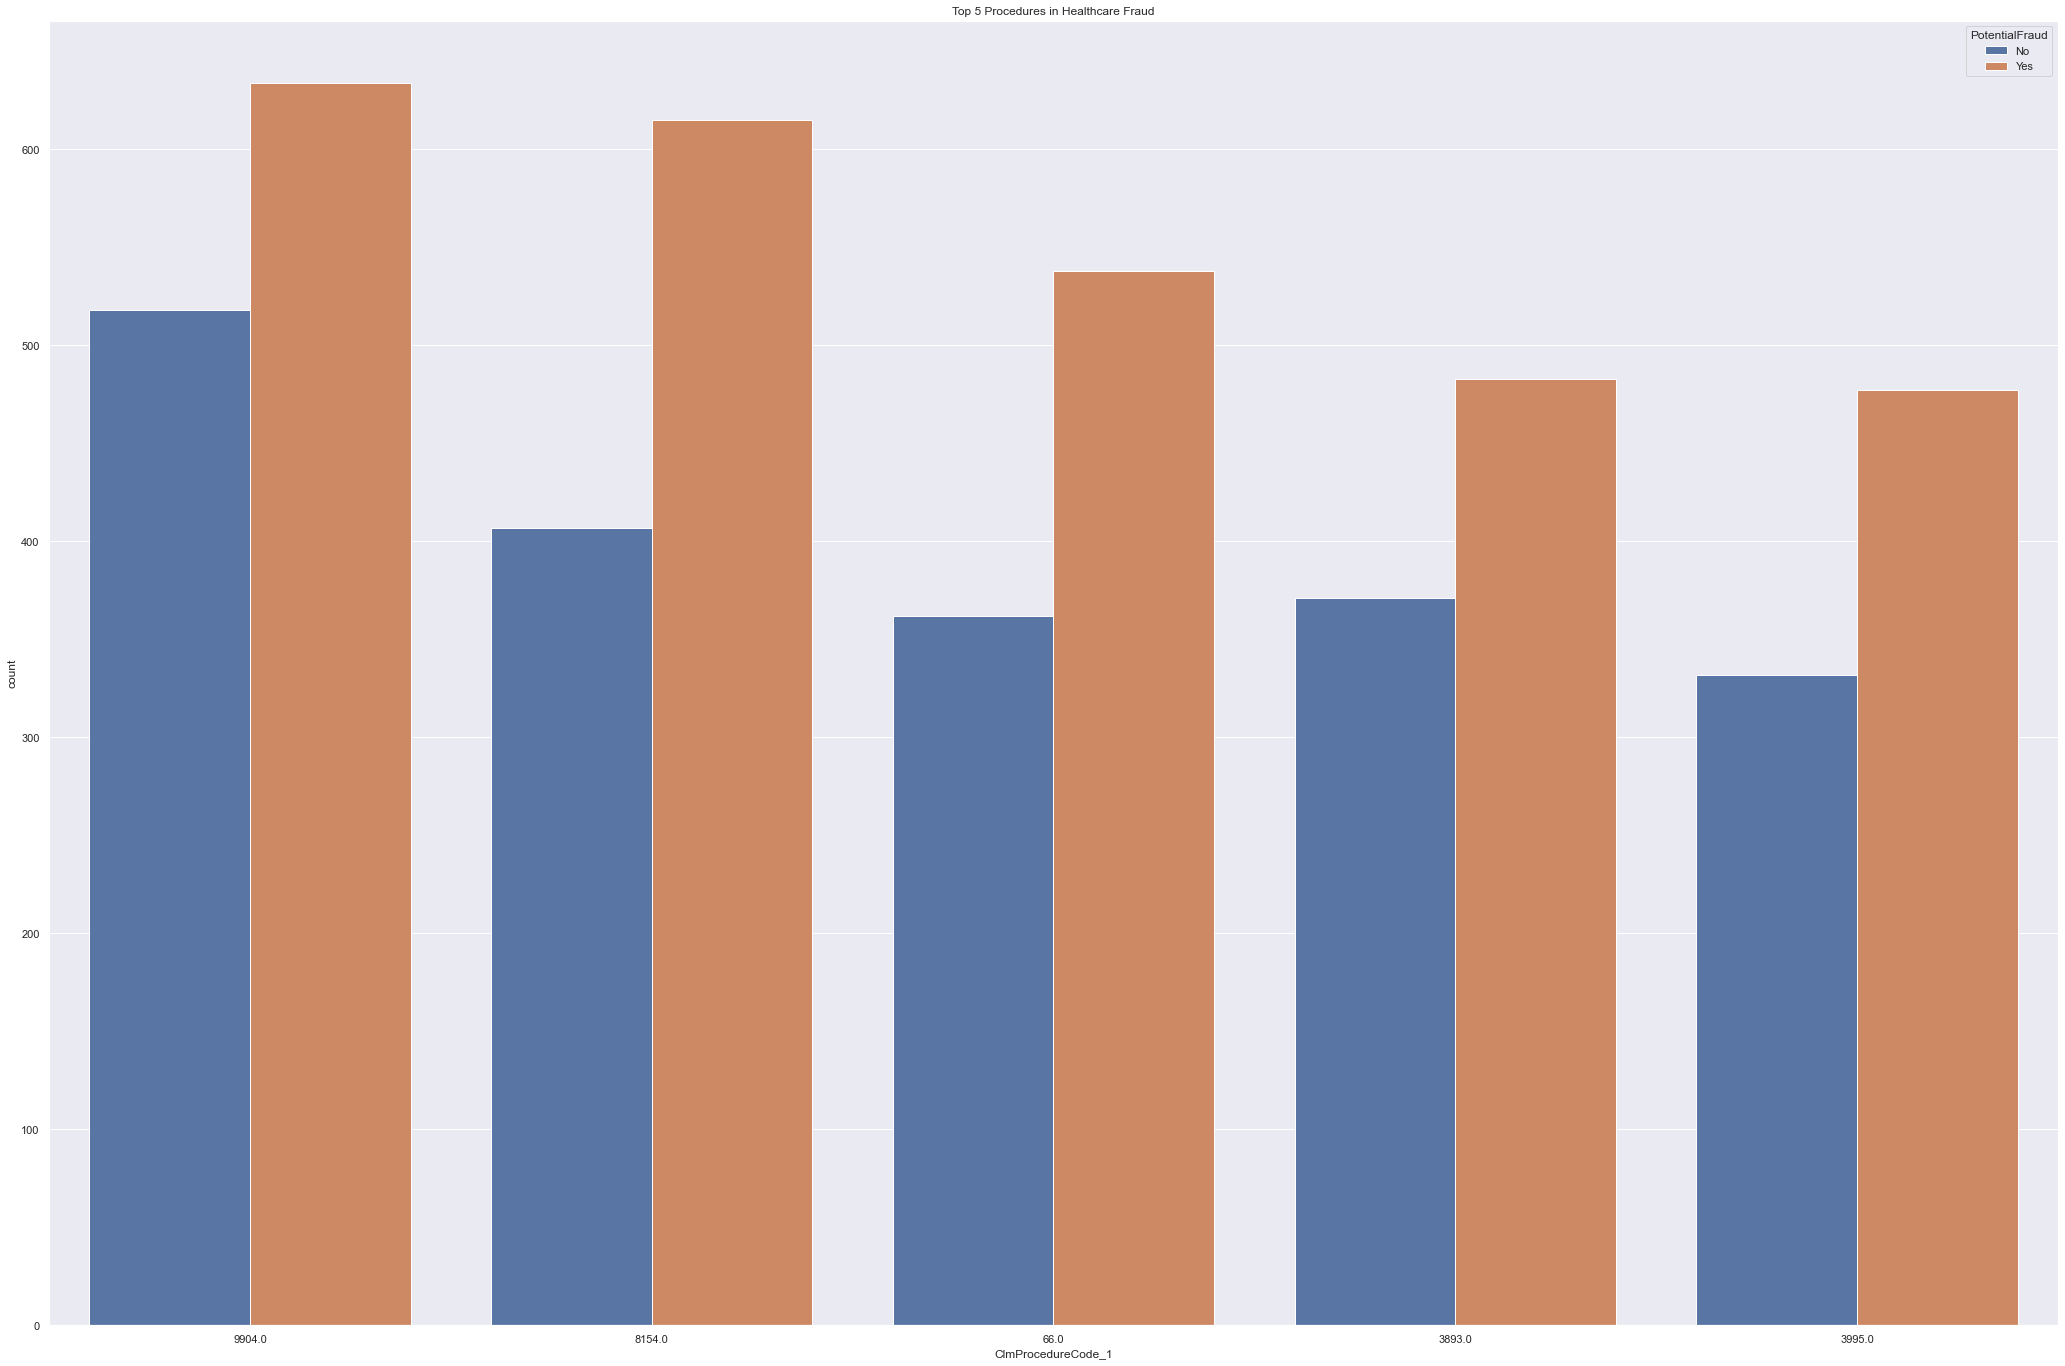

<Figure size 2592x1728 with 0 Axes>

In [109]:
#Plot countplot for each fraud non fraud categories

sns.set(rc={'figure.figsize':(36,24)},style='darkgrid')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=PP_Train
              ,order=PP_Train.ClmProcedureCode_1.value_counts().iloc[:5].index)

plt.title('Top 5 Procedures in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProcedures')

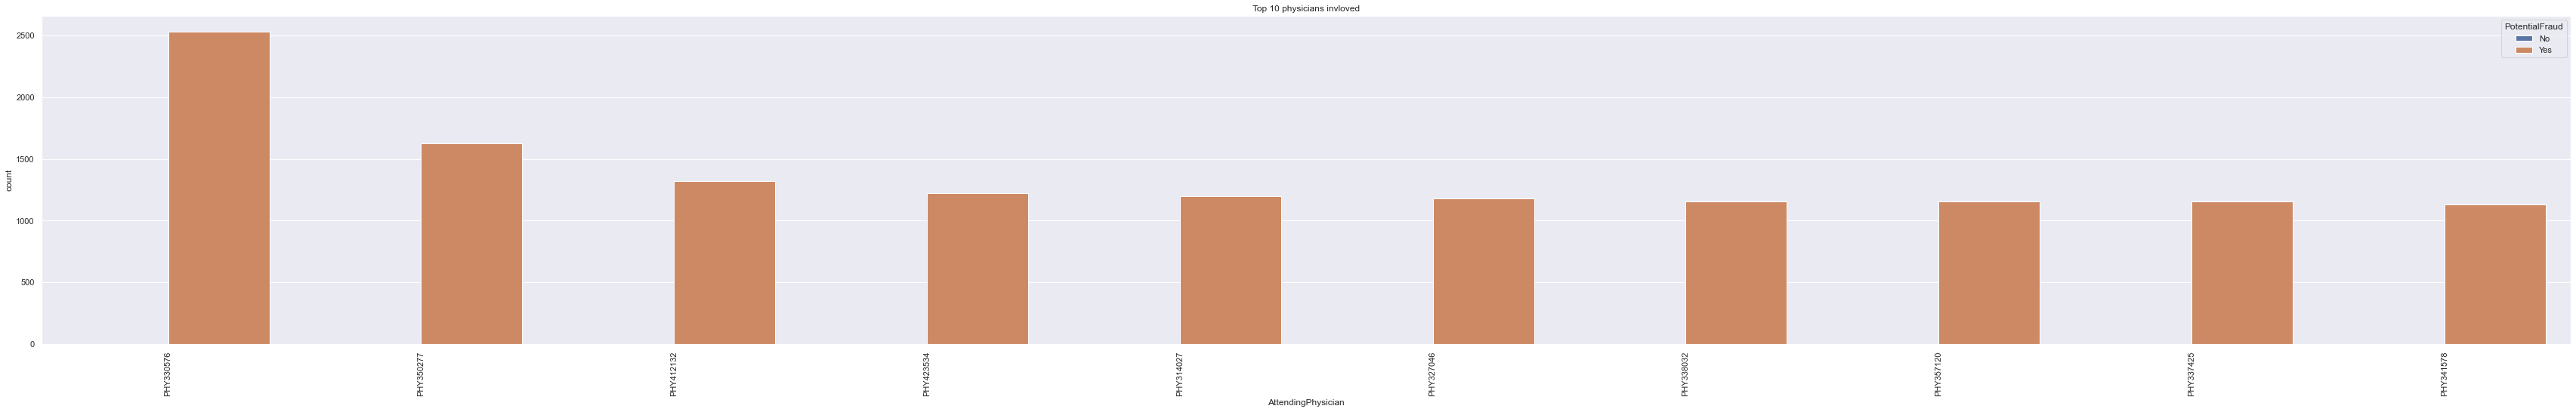

<Figure size 4320x576 with 0 Axes>

In [112]:
#Physicians invloved

sns.set(rc={'figure.figsize':(60,8)},style='darkgrid')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=PP_Train,order=PP_Train.AttendingPhysician.value_counts().iloc[:10].index)

    
plt.title('Top 10 physicians invloved')
plt.xticks(rotation=90)
plt.show()

plt.savefig('Topphysiciansinvloved')

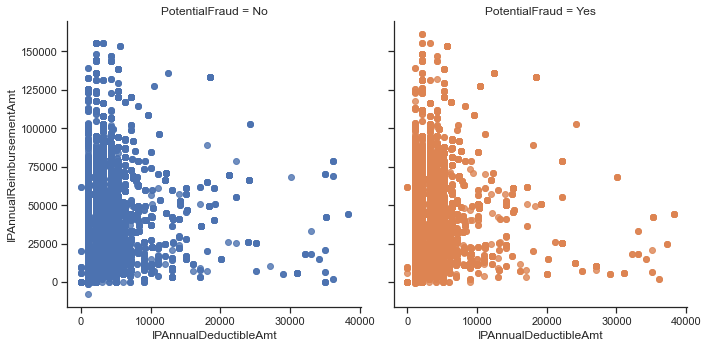

In [115]:


sns.set(rc={'figure.figsize':(12,8)},style='ticks')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=PP_Train)


plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

In [116]:
#No obvious difference there

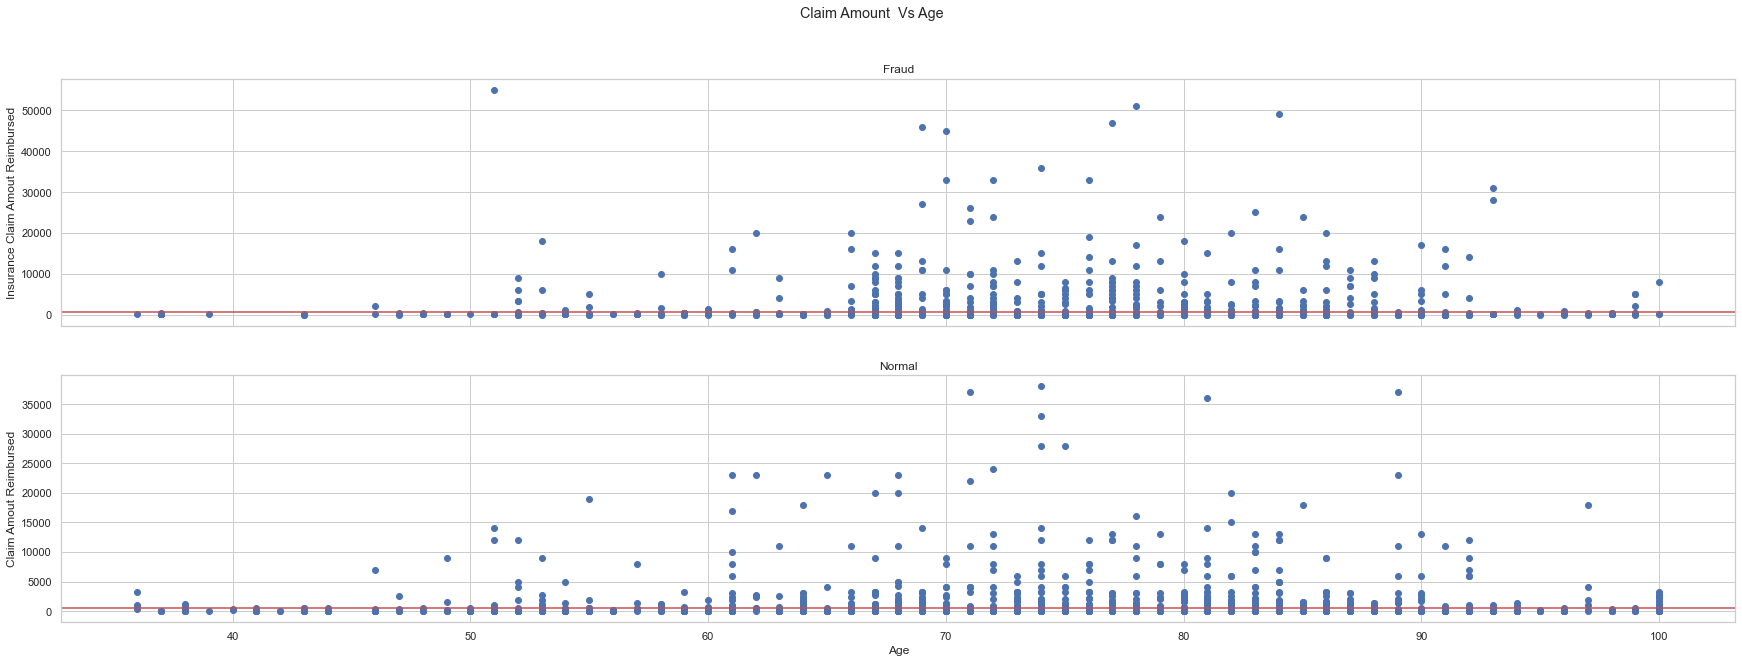

In [118]:
# Claim Amount versus Age
sns.set(rc={'figure.figsize':(30,10)},style='whitegrid')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Claim Amount  Vs Age')

ax1.scatter(PP_Train[PP_Train.PotentialFraud=='Yes'].Age, 
            PP_Train[PP_Train.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=600,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(PP_Train[PP_Train.PotentialFraud=='No'].Age, 
            PP_Train[PP_Train.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=600,c='r')
ax2.set_xlabel('Age')
ax2.set_ylabel('Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

In [122]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [125]:
 
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=8) 